In [36]:
from pathlib import Path

import xarray as xr

In [37]:
pws = Path('/Users/rdcrlzh1/Documents/SWE_error_analysis/local/pw')

In [38]:
265*(2025-2016)

2385

In [40]:
x, y = (-146.7333333, 65.116667)
site_name = 'little_chena'

from tqdm import tqdm

das = []
for fp in tqdm(sorted(list(pws.glob('*.nc4')))):
    try:
        ds = xr.open_dataset(fp)
        das.append(ds['TQV'].sel(lon = x, lat = y, method = 'nearest'))
    except OSError:
        pass


100%|██████████| 3377/3377 [00:26<00:00, 129.47it/s]


In [56]:
xr.open_dataset(next(pws.glob('*')))

<xarray.Dataset> Size: 160MB
Dimensions:  (lon: 576, lat: 361, time: 24)
Coordinates:
  * lon      (lon) float64 5kB -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat      (lat) float64 3kB -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * time     (time) datetime64[ns] 192B 2021-07-02 ... 2021-07-02T23:00:00
Data variables:
    CPT      (time, lat, lon) float32 20MB ...
    KE       (time, lat, lon) float32 20MB ...
    MASS     (time, lat, lon) float32 20MB ...
    THV      (time, lat, lon) float32 20MB ...
    TOX      (time, lat, lon) float32 20MB ...
    TQI      (time, lat, lon) float32 20MB ...
    TQL      (time, lat, lon) float32 20MB ...
    TQV      (time, lat, lon) float32 20MB ...
Attributes: (12/30)
    Comment:                           GMAO filename: d5124_m2_jun21.inst1_2d...
    Conventions:                       CF-1
    Institution:                       NASA Global Modeling and Assimilation ...
    References:                        http://gmao.gsfc.nasa.gov
    Format:                            NetCDF-4/HDF-5
    SpatialCoverage:                   global
    ...                                ...
    History:                           Re-processed file generated: Wed Nov 2...
    identifier_product_doi:            10.5067/G0U6NGQ3BLE0
    RangeBeginningDate:                2021-07-02
    RangeBeginningTime:                00:00:00.000000
    RangeEndingDate:                   2021-07-02
    RangeEndingTime:                   23:00:00.000000

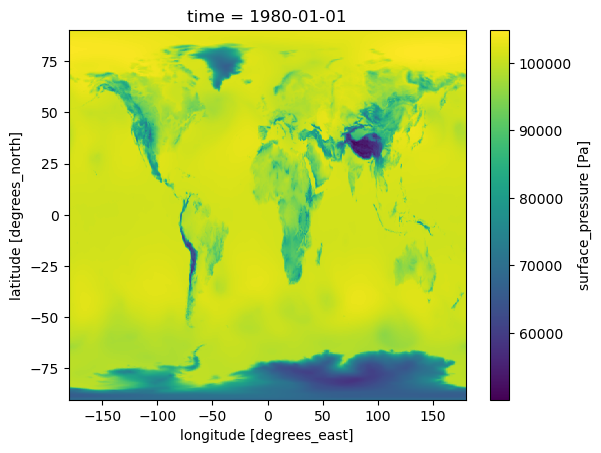

In [75]:
ds['PS'].isel(time = 0).plot()

In [78]:
ds

<xarray.Dataset> Size: 479MB
Dimensions:  (lon: 576, lat: 361, time: 24)
Coordinates:
  * lon      (lon) float64 5kB -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat      (lat) float64 3kB -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * time     (time) datetime64[ns] 192B 1980-01-01 ... 1980-01-01T23:00:00
Data variables: (12/24)
    DISPH    (time, lat, lon) float32 20MB ...
    PS       (time, lat, lon) float32 20MB ...
    QV10M    (time, lat, lon) float32 20MB ...
    QV2M     (time, lat, lon) float32 20MB ...
    SLP      (time, lat, lon) float32 20MB ...
    T10M     (time, lat, lon) float32 20MB ...
    ...       ...
    U10M     (time, lat, lon) float32 20MB ...
    U2M      (time, lat, lon) float32 20MB ...
    U50M     (time, lat, lon) float32 20MB ...
    V10M     (time, lat, lon) float32 20MB ...
    V2M      (time, lat, lon) float32 20MB ...
    V50M     (time, lat, lon) float32 20MB ...
Attributes: (12/30)
    History:                           Original file generated: Sat May 31 18...
    Comment:                           GMAO filename: d5124_m2_jan79.inst1_2d...
    Filename:                          MERRA2_100.inst1_2d_asm_Nx.19800101.nc4
    Conventions:                       CF-1
    Institution:                       NASA Global Modeling and Assimilation ...
    References:                        http://gmao.gsfc.nasa.gov
    ...                                ...
    Contact:                           http://gmao.gsfc.nasa.gov
    identifier_product_doi:            10.5067/3Z173KIE2TPD
    RangeBeginningDate:                1980-01-01
    RangeBeginningTime:                00:00:00.000000
    RangeEndingDate:                   1980-01-01
    RangeEndingTime:                   23:00:00.000000

In [77]:
ds = xr.open_dataset('/Users/rdcrlzh1/Downloads/MERRA2_100.inst1_2d_asm_Nx.19800101 (1).nc4')
for v in ds.data_vars:
    print(v)
    print(ds[v].attrs['long_name'])

DISPH
zero_plane_displacement_height
PS
surface_pressure
QV10M
10-meter_specific_humidity
QV2M
2-meter_specific_humidity
SLP
sea_level_pressure
T10M
10-meter_air_temperature
T2M
2-meter_air_temperature
TO3
total_column_ozone
TOX
total_column_odd_oxygen
TQI
total_precipitable_ice_water
TQL
total_precipitable_liquid_water
TQV
total_precipitable_water_vapor
TROPPB
tropopause_pressure_based_on_blended_estimate
TROPPT
tropopause_pressure_based_on_thermal_estimate
TROPPV
tropopause_pressure_based_on_EPV_estimate
TROPQ
tropopause_specific_humidity_using_blended_TROPP_estimate
TROPT
tropopause_temperature_using_blended_TROPP_estimate
TS
surface_skin_temperature
U10M
10-meter_eastward_wind
U2M
2-meter_eastward_wind
U50M
eastward_wind_at_50_meters
V10M
10-meter_northward_wind
V2M
2-meter_northward_wind
V50M
northward_wind_at_50_meters


In [41]:
da = xr.concat(das, 'time')

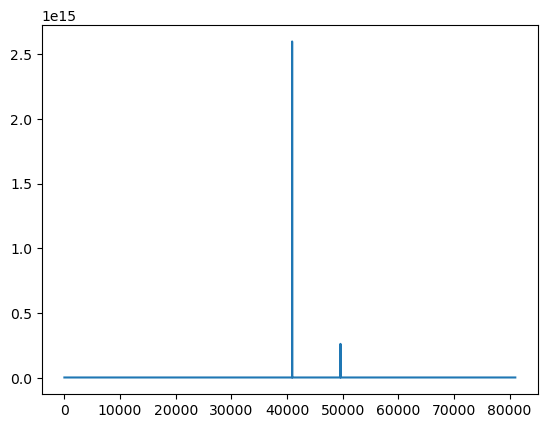

In [54]:
import matplotlib.pyplot as plt
plt.plot(da.sortby('time').time.diff('time'))

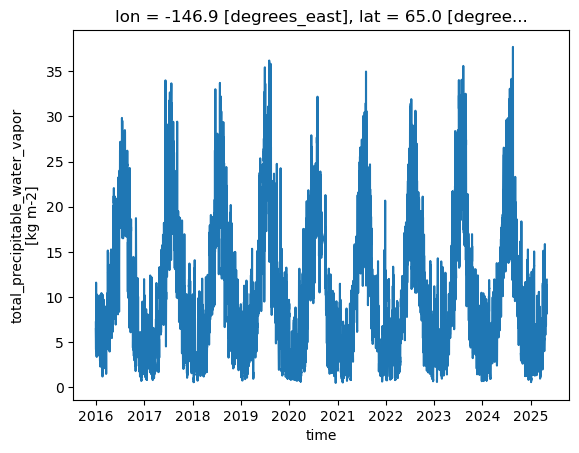

In [46]:
da.sortby('time').plot()